# Introducing:

## Context:
Работа с данными

предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?


сделать можно на питоне в юпитер или экселе или в гугл шите, даже можете в sql сделать, как удобнее.


обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.


## Task:
Проверить сработала ли акция

## Used libraries:
- pandas
- numpy
- matplotlib
- sqlite3

In [76]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Data preparation

In [22]:
con = sqlite3.connect('db')

In [23]:
cur = con.cursor()

In [24]:
def select(sql):
  return pd.read_sql(sql,con)

## Read data

In [25]:
df = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/5_retention/data/analyst_test_transactions_db.csv')
df.head(5)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


## Format data

In [26]:
len(df)

76857

In [27]:
df['reg_date'].agg(['min','max'])

min    1900-01-01
max    2015-11-20
Name: reg_date, dtype: object

In [28]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [29]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [30]:
df['reg_month'] = df['reg_date'].astype('datetime64[M]')

In [35]:
df['reg_date'].agg(['min','max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

# Analysis

In [39]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-24,2,2
2012-02-27,3,3
2012-02-29,4,4
2012-03-01,25,25
...,...,...
2015-11-16,34,34
2015-11-17,22,22
2015-11-18,28,28


In [40]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

In [41]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,138,138
2015-01-02,97,97
2015-01-03,118,118
2015-01-04,106,106
2015-01-05,103,103
...,...,...
2015-11-16,362,360
2015-11-17,341,341
2015-11-18,375,374


In [42]:
df['user_id'].nunique()

48214

In [43]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

1363

<AxesSubplot: >

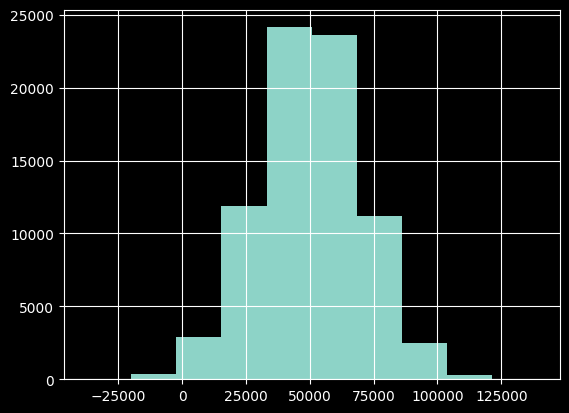

In [44]:
df['user_id'].hist()

In [45]:
df[df['user_id']<0]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
117,-7670,84002.0,2015-02-09,2015-02-22,808,2015-02-09,2015-02-22
144,-4741,141322.0,2015-06-15,2015-10-07,728,2015-06-15,2015-10-07
339,-16994,22456.0,2015-06-13,2015-07-25,878,2015-06-13,2015-07-25
380,-6927,157109.0,2015-02-07,2015-06-12,727,2015-02-07,2015-06-12
503,-5446,74254.0,2014-08-08,2015-03-05,711,2014-08-08,2015-03-05
...,...,...,...,...,...,...,...
76104,-10718,85345.0,2014-09-12,2015-09-25,783,2014-09-12,2015-09-25
76133,-2931,137163.0,2014-11-30,2015-05-13,952,2014-11-30,2015-05-13
76302,-2156,78342.0,2014-09-15,2015-03-11,834,2014-09-15,2015-03-11
76585,-5397,30581.0,2012-03-11,2015-11-20,1054,2012-03-11,2015-11-20


<AxesSubplot: >

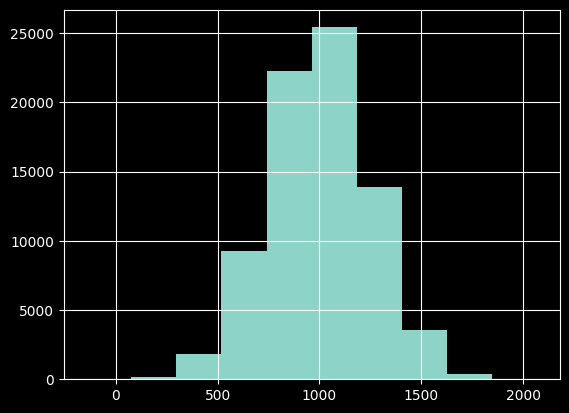

In [46]:
df['revenue'].hist()

<AxesSubplot: >

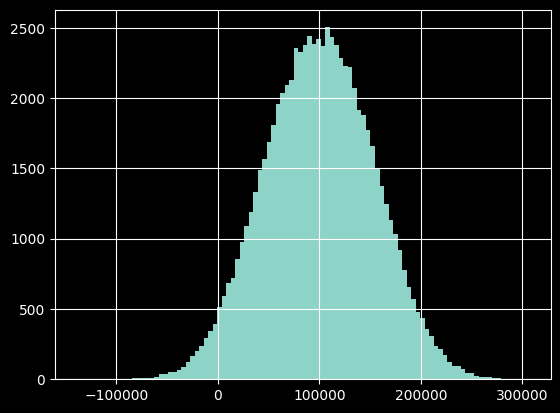

In [47]:
df['order_id'].hist(bins=100)

In [48]:
user = df.groupby('user_id')['reg_month'].min().reset_index()

In [49]:
user

,user_id,reg_month
0,-37599,2015-01-19
1,-32239,2015-11-05
2,-29822,2015-07-31
3,-29531,2014-09-07
4,-25337,2015-04-10
...,...,...
48209,128964,2015-10-18
48210,130617,2015-02-04
48211,131071,2012-04-18
48212,132484,2015-06-12


In [50]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

324

In [51]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [52]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS')) 

In [53]:
month.columns = ['month']

In [54]:
user['key'] = 1
month['key'] = 1

In [55]:
template = user.merge(month,on='key')[['user_id','reg_month','month']]

In [56]:
len(template)

530354

In [57]:
template = template[template['month'] >= template['reg_month']]

In [58]:
template

,user_id,reg_month,month
1,-37599,2015-01-19,2015-02-01
2,-37599,2015-01-19,2015-03-01
3,-37599,2015-01-19,2015-04-01
4,-37599,2015-01-19,2015-05-01
5,-37599,2015-01-19,2015-06-01
...,...,...,...
530349,138987,2014-10-29,2015-07-01
530350,138987,2014-10-29,2015-08-01
530351,138987,2014-10-29,2015-09-01
530352,138987,2014-10-29,2015-10-01


In [59]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [60]:
trans_month.columns = ['user_id','month','revenue']

In [61]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

In [62]:
report['active'] = (report['revenue'] > 0)*1

In [63]:
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-19,2015-02-01,NaN,0
1,-37599,2015-01-19,2015-03-01,NaN,0
2,-37599,2015-01-19,2015-04-01,NaN,0
3,-37599,2015-01-19,2015-05-01,NaN,0
4,-37599,2015-01-19,2015-06-01,NaN,0
...,...,...,...,...,...
452335,138987,2014-10-29,2015-07-01,NaN,0
452336,138987,2014-10-29,2015-08-01,NaN,0
452337,138987,2014-10-29,2015-09-01,NaN,0
452338,138987,2014-10-29,2015-10-01,NaN,0


In [64]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='count')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
2012-02-24,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2012-02-27,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2012-02-29,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2012-03-01,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


In [65]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='sum')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-02-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-01,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [66]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

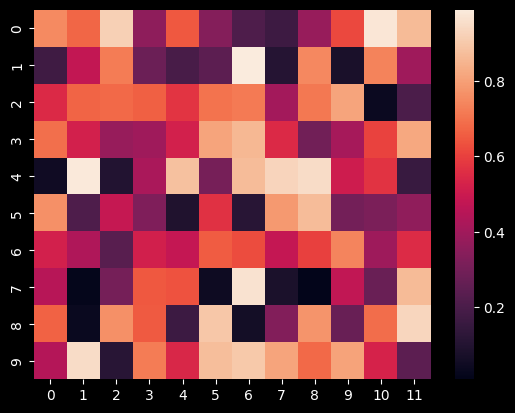

In [67]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

<AxesSubplot: xlabel='month', ylabel='reg_month'>

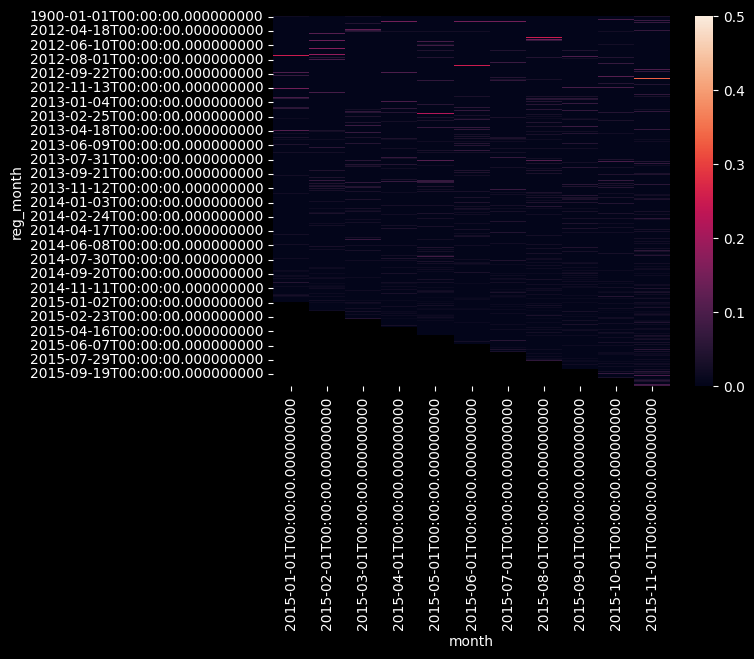

In [68]:
sns.heatmap(retention)

In [69]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.018868,0.0,0.018868,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.037736
2012-02-24,0.500000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-02-27,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-02-29,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
2012-03-01,0.000000,0.0,0.040000,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2015-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105263
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333


In [70]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [71]:
report[report['user_id'] == 128006]

,user_id,reg_month,month,revenue,active,lifetime
452282,128006,2015-01-25,2015-02-01,NaN,0,0
452283,128006,2015-01-25,2015-03-01,NaN,0,1
452284,128006,2015-01-25,2015-04-01,NaN,0,2
452285,128006,2015-01-25,2015-05-01,NaN,0,3
452286,128006,2015-01-25,2015-06-01,NaN,0,4
452287,128006,2015-01-25,2015-07-01,NaN,0,5
452288,128006,2015-01-25,2015-08-01,NaN,0,6
452289,128006,2015-01-25,2015-09-01,NaN,0,7
452290,128006,2015-01-25,2015-10-01,NaN,0,8
452291,128006,2015-01-25,2015-11-01,NaN,0,9


In [72]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [73]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

In [74]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.084906,0.0000,0.000000,0.0,0.018868,0.0,0.000000,0.018868,0.0000,0.028302,0.009434
2015-01-02,NaN,0.0125,0.025000,0.0,0.000000,0.0,0.000000,0.000000,0.0125,0.000000,0.025000
2015-01-03,NaN,0.0000,0.000000,0.0,0.000000,0.0,0.017241,0.000000,0.0000,0.000000,0.017241
2015-01-04,NaN,0.0000,0.015385,0.0,0.000000,0.0,0.000000,0.015385,0.0000,0.000000,0.000000
2015-01-05,NaN,0.0000,0.016667,0.0,0.016667,0.0,0.000000,0.016667,0.0000,0.016667,0.016667
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-29,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-30,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='lifetime', ylabel='reg_month'>

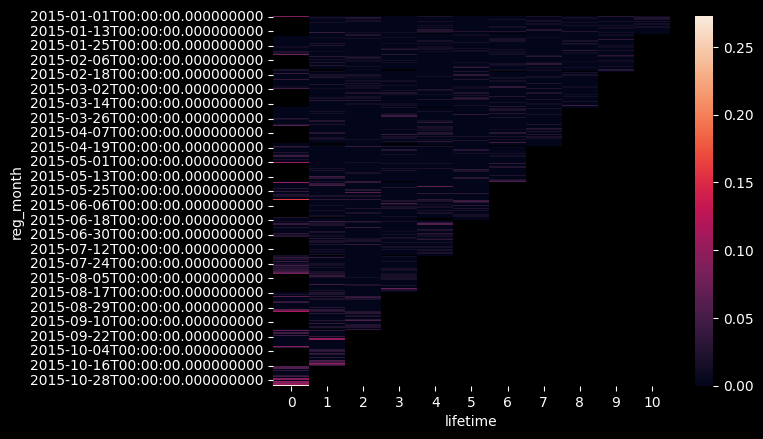

In [75]:
sns.heatmap(retention)

# SQL

In [77]:
df = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-python-pandas/5_retention/data/analyst_test_transactions_db.csv')
df.head(5)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [78]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')


In [79]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [80]:
df.to_sql('trans',con,index=False,if_exists='replace')

76857

In [83]:
sql = ''' 
SELECT *
FROM trans AS t
'''

In [84]:
select(sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22 00:00:00,2015-07-16 00:00:00,1088
1,40047,81824.0,2013-11-24 00:00:00,2015-01-19 00:00:00,1027
2,48153,144851.0,2015-07-03 00:00:00,2015-10-29 00:00:00,601
3,54591,116111.0,2013-07-12 00:00:00,2015-04-30 00:00:00,881
4,39789,134943.0,2013-05-25 00:00:00,2015-07-21 00:00:00,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15 00:00:00,2015-03-28 00:00:00,1095
76853,31360,145146.0,2015-01-04 00:00:00,2015-08-09 00:00:00,547
76854,56195,8929.0,2012-09-18 00:00:00,2015-11-12 00:00:00,850
76855,46362,78673.0,2015-02-20 00:00:00,2015-07-21 00:00:00,356


In [87]:
sql = '''
SELECT t.user_id,
    date(min(reg_date),'start of month') AS reg_month 
    FROM trans AS  t
GROUP BY t.user_id
'''

In [86]:
select(sql)

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [88]:
min = '''
SELECT date(min(t.transaction_date),'start of month')
FROM trans AS t
'''

In [89]:
select(min)

,"date(min(t.transaction_date),'start of month')"
0,2015-01-01


In [90]:
max = '''
SELECT date(max(t.transaction_date),'start of month')
FROM trans AS t
'''

In [91]:
select(max)

,"date(max(t.transaction_date),'start of month')"
0,2015-11-01


In [92]:
sql = f'''WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates;'''

In [93]:
select(sql)

,date
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [94]:
sql = f'''with users as  (select t.user_id, date(min(reg_date),'start of month') as reg_month from trans t
group by t.user_id),

dates as (

WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates

),

template as (

select t.user_id, t.reg_month, d.date as month from users t
join dates d on d.date >= t.reg_month),

trans_month as (

select t.user_id,
date(t.transaction_date,'start of month') as month,

sum(t.revenue) as revenue_sum,
count(1) as transaction_cnt


 from trans t

 group by
t.user_id,
date(t.transaction_date,'start of month')

),

report as (
select t.*, tm.revenue_sum, tm.transaction_cnt,
case when tm.revenue_sum > 0 then 1 else 0 end as active,

round((julianday(t.month) - julianday(t.reg_month)) / 30) as lifetime

 from template t
left join trans_month tm on t.user_id = tm.user_id and t.month = tm.month)


select t.reg_month, t.lifetime, avg(t.active) as retention from report t
where t.reg_month >= '2015-01-01'
group by t.reg_month, t.lifetime

'''

In [95]:
t = select(sql)

In [96]:
t.pivot_table(index='reg_month',columns='lifetime',values='retention',aggfunc='max')

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.084906,0.0000,0.000000,0.0,0.018868,0.0,0.000000,0.018868,0.0000,0.028302,0.009434
2015-01-02,NaN,0.0125,0.025000,0.0,0.000000,0.0,0.000000,0.000000,0.0125,0.000000,0.025000
2015-01-03,NaN,0.0000,0.000000,0.0,0.000000,0.0,0.017241,0.000000,0.0000,0.000000,0.017241
2015-01-04,NaN,0.0000,0.015385,0.0,0.000000,0.0,0.000000,0.015385,0.0000,0.000000,0.000000
2015-01-05,NaN,0.0000,0.016667,0.0,0.016667,0.0,0.000000,0.016667,0.0000,0.016667,0.016667
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-29,0.105263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-30,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
